# Homework: Compare Two Logistic Regression Models (Weather & Climate)

**Compare the performance of two logistic regression models**  
- **Model A (Full):** `CAPE`, `PWAT`, `Shear`  
- **Model B (Reduced):** `CAPE`, only

Does the three parameter model work better than the one parameter model?

**Tasks**
1. Split data into train/test.
2. Fit both models.
3. Compute **accuracy**, **precision**, **recall** at threshold 0.5.
4. Plot **ROC** and **Precision–Recall** curves for both models on the same figures.
5. Answer the interpretation questions.


In [63]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay,
                             accuracy_score, precision_score, recall_score)

FEATURES_FULL = ['cape','pwat','shear']
FEATURES_REDUCED = ['cape']
TARGET = 'event'

# Synthetic fallback
USE_SYNTHETIC = True

if USE_SYNTHETIC:
    rng = np.random.default_rng(42)
    n = 1200
    cape  = rng.gamma(5.0, 250.0, size=n)
    pwat  = rng.normal(30, 8, size=n).clip(5, 70)
    shear = rng.normal(15, 6, size=n).clip(0, 40)
    z = -6.0 + 0.0025*cape + 0.06*pwat + 0.05*shear + 0.00002*cape*shear
    p = 1/(1+np.exp(-z))
    y = rng.binomial(1, p)
    df = pd.DataFrame({'cape':cape, 'pwat':pwat, 'shear':shear, 'event':y})
else:
    df = pd.read_csv('../data/your_data.csv').dropna()
    assert TARGET in df.columns
    assert all(c in df.columns for c in FEATURES_FULL)
    df = df[FEATURES_FULL + [TARGET]]
df.head()

,cape,pwat,shear,event
0,1339.091679,24.846334,4.350342,1
1,1620.699558,34.709626,23.376549,1
2,1237.079261,26.431445,20.809474,1
3,1157.616507,37.841527,29.506833,1
4,1708.955858,32.249385,6.662860,1


## 1) Train/Test Split

In [64]:
# TODO: Split into train/test for both feature sets using SAME random_state and stratify by y
X_full = df[FEATURES_FULL].values
X_reduced = df[FEATURES_REDUCED].values
y = df[TARGET].values.astype(int)

# YOUR CODE HERE
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_full, y, test_size=0.25, random_state=0, stratify=y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reduced, y, test_size=0.25, random_state=0, stratify=y)

len(Xf_train), len(Xf_test)

(900, 300)

## 2) Fit Both Logistic Regression Models

In [65]:
# TODO: Fit two LogisticRegression models (full and reduced). Use max_iter >= 200.
# YOUR CODE HERE
clf_full = LogisticRegression(max_iter=200).fit(Xf_train, yf_train)
clf_reduced = LogisticRegression(max_iter=200).fit(Xr_train, yr_train)

yprob_full = clf_full.predict_proba(Xf_test)[:,1]
yprob_reduced = clf_reduced.predict_proba(Xr_test)[:,1]

clf_full.coef_, clf_reduced.coef_

(array([[0.00294362, 0.0514564 , 0.0928135 ]]), array([[0.00269818]]))

## 3) Metrics at Threshold 0.5

In [66]:
thr = 0.5
ypred_full = (yprob_full >= thr).astype(int)
ypred_reduced = (yprob_reduced >= thr).astype(int)

# TODO: Compute Accuracy, Precision, Recall for both models at threshold 0.5
# Model A (Full) scores
acc_full = accuracy_score(yf_test, ypred_full)
prec_full = precision_score(yf_test, ypred_full, zero_division=0)
rec_full = recall_score(yf_test, ypred_full, zero_division=0)

print(f"Full Model A Accuracy: {acc_full:.3f}\
    \nFull Model A Precision: {prec_full:.3f}\
    \nFull Model A Recall: {rec_full:.3f}")

# Model B (Reduced) scores
acc_reduced = accuracy_score(yr_test, ypred_reduced)
prec_reduced = precision_score(yr_test, ypred_reduced, zero_division=0)
rec_reduced = recall_score(yr_test, ypred_reduced, zero_division=0)

print(f"Reduced Model B Accuracy: {acc_reduced:.3f}\
    \nReduced Model B Precision: {prec_reduced:.3f}\
    \nReduced Model B Recall: {rec_reduced:.3f}")



Full Model A Accuracy: 0.723    
Full Model A Precision: 0.733    
Full Model A Recall: 0.678
Reduced Model B Accuracy: 0.717    
Reduced Model B Precision: 0.736    
Reduced Model B Recall: 0.651


## 4) Plot ROC and Precision–Recall Curves

Text(0.5, 1.0, 'ROC Curve')

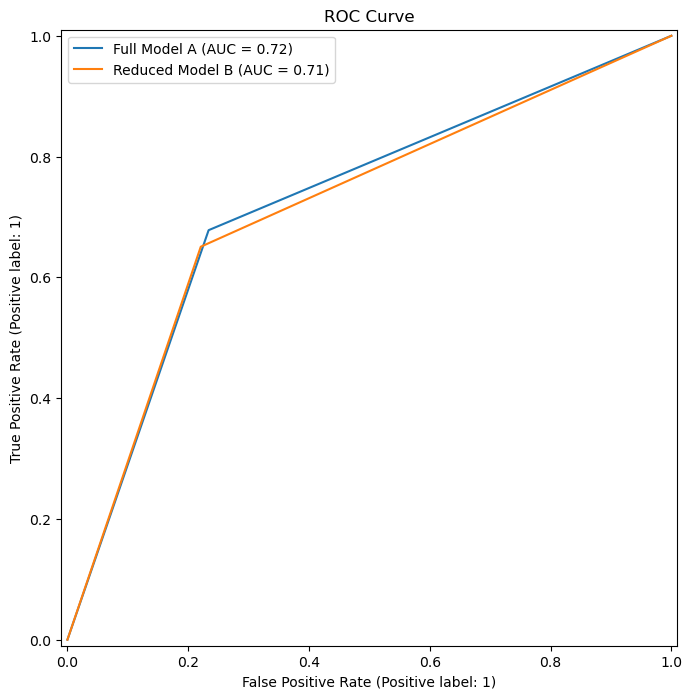

In [67]:
# TODO: Plot ROC and PR curves for both models on shared axes
# ROC plots
fig, ax1 = plt.subplots(figsize=(10, 8))
roc_display_a = RocCurveDisplay.from_predictions(yf_test, ypred_full, ax=ax1, name='Full Model A')
roc_display_b = RocCurveDisplay.from_predictions(yr_test, ypred_reduced, ax=ax1, 
                                                 name='Reduced Model B')
ax1.legend()
ax1.set_title('ROC Curve')

Text(0.5, 1.0, 'PR Curve')

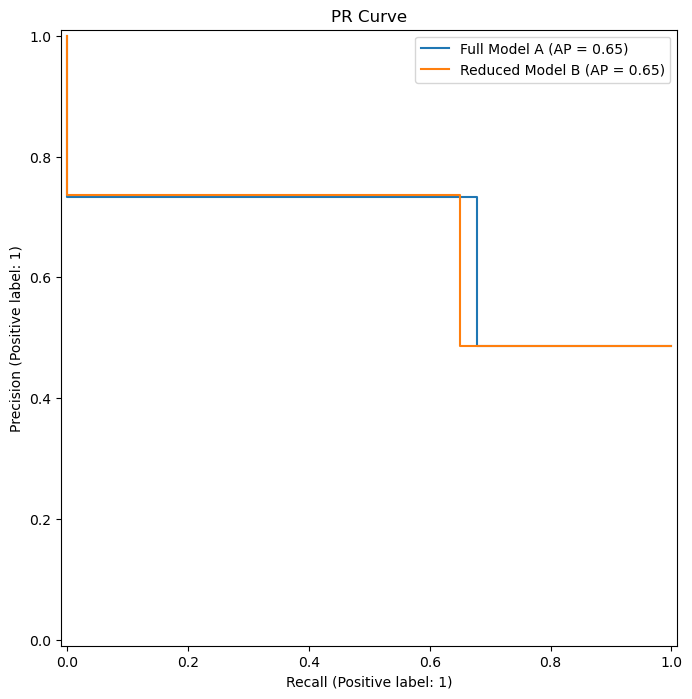

In [69]:
# PR plots
fig, ax1 = plt.subplots(figsize=(10, 8))
roc_display_a = PrecisionRecallDisplay.from_predictions(yf_test, ypred_full, ax=ax1, name='Full Model A')
roc_display_b = PrecisionRecallDisplay.from_predictions(yr_test, ypred_reduced, ax=ax1, name='Reduced Model B')
ax1.legend()
ax1.set_title('PR Curve')

## 5) Interpretation

1. Which model has higher **ROC-AUC** and **PR-AUC**? What does this imply about `PWAT`?  

The Full model has a slightly higher ROC-AUC and PR-AUC values compared to the Reduced model in the curve plots. Thus, it seems that precipitable water (PWAT) have some significance to better identify severe weather events. This is reasonable considering a column of air needs to be humid enough for CAPE to actually produce storm clouds from the instability.


2. Compare **accuracy**, **precision**, and **recall** for both models.  
   Overall the two models show litte difference in their accuracy and precision, but the Full model has a slightly higher recall.  

   - Which model would you choose to **maximize event detection** (recall)?  
   Naturally, I would choose the Full model to maximize event detection based on the recalls.

   - Which model would you choose to **minimize false alarms** (precision)?  
   I would technically use the Reduced model based on its slightly better precision score.

Full Model A Accuracy: 0.723    
Full Model A Precision: 0.733    
Full Model A Recall: 0.678
Reduced Model B Accuracy: 0.717    
Reduced Model B Precision: 0.736    
Reduced Model B Recall: 0.651